In [163]:
import pandas as pd
import seaborn as sns
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

from notears import linear, nonlinear, utils

In [62]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 100, 20, 20, 'ER', 'gauss'



# Let's simulate (and keep) the DAG
B_true = utils.simulate_dag(d, s0, graph_type)

Xs, Ws = np.ndarray((0, n, d)), np.ndarray((0, d, d))

for i in range(100):
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type)
    
    Ws = np.append(Ws, [W_true], axis=0)
    Xs = np.append(Xs, [X], axis=0)


[0, 2, 4, 5, 6, 7, 10, 11, 13, 14, 18, 3, 12, 9, 16, 17, 19, 1, 8, 15]


<BarContainer object of 20 artists>

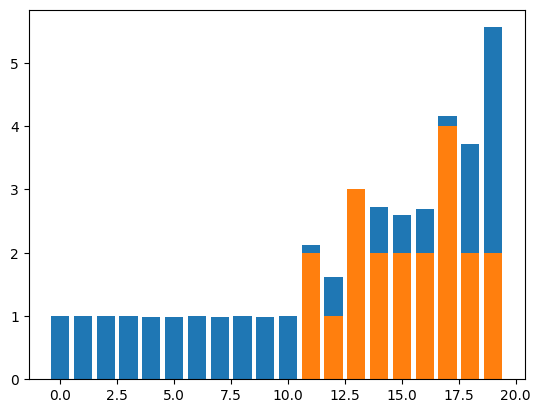

In [133]:
stds = Xs.std(axis=1)

means = stds.mean(axis=0)
stds_ = stds.std(axis=0)

g = ig.Graph.Adjacency(B_true, loops=False)
g.vs["label"] = list(range(d))

sorting = g.topological_sorting()

print(sorting)

means_sorted = []
stds_sorted = []
for s in sorting:
    means_sorted.append(means[s])
    stds_sorted.append(stds[s])

parents = []
for s in sorting:
    parents.append(np.count_nonzero(np.array(g.dfs(s, mode="in")[1]) == s))
    
plt.bar(list(range(d)), means_sorted)
plt.bar(list(range(d)), parents)

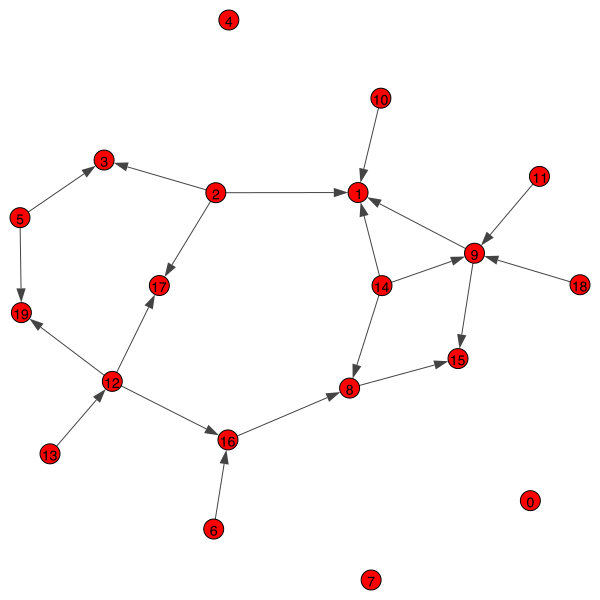

In [73]:
ig.plot(g)

In [88]:
g.ancestors?

Object `g.ancestors` not found.


In [111]:
g.vertex_connectivity?

In [131]:
vertex = 15



2

In [128]:
g.dfs(16, mode="in")

([16, 12, 13, 6], [-1, 16, 12, 16])

In [156]:
W_est = linear.notears_linear(X, lambda1=0.1, loss_type='l2')

In [160]:
W_est[W_est != 0] = 1
g_est = ig.Graph.Adjacency(W_est, loops=False)
g_est.vs["label"] = list(range(d))

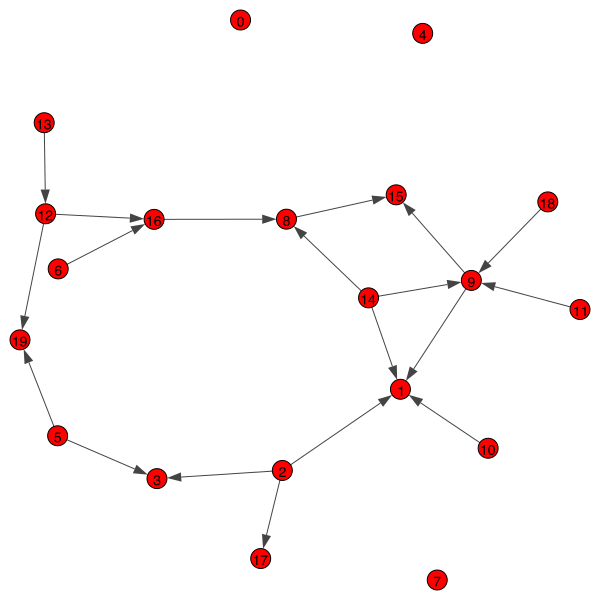

In [161]:
ig.plot(g_est)

In [162]:
utils.count_accuracy(B_true, W_est)

{'fdr': 0.0, 'tpr': 0.95, 'fpr': 0.0, 'shd': 1, 'nnz': 19}

In [171]:
X_norm = X / X.std(axis=0) + X.mean(axis=0)

W_est_norm = linear.notears_linear(X_norm, lambda1=0.1, loss_type='l2')
W_est_norm[W_est_norm != 0] = 1
g_est_norm = ig.Graph.Adjacency(W_est_norm, loops=False)
g_est_norm.vs["label"] = list(range(d))


utils.count_accuracy(B_true, W_est_norm)

{'fdr': 0.7222222222222222,
 'tpr': 0.25,
 'fpr': 0.07647058823529412,
 'shd': 20,
 'nnz': 18}

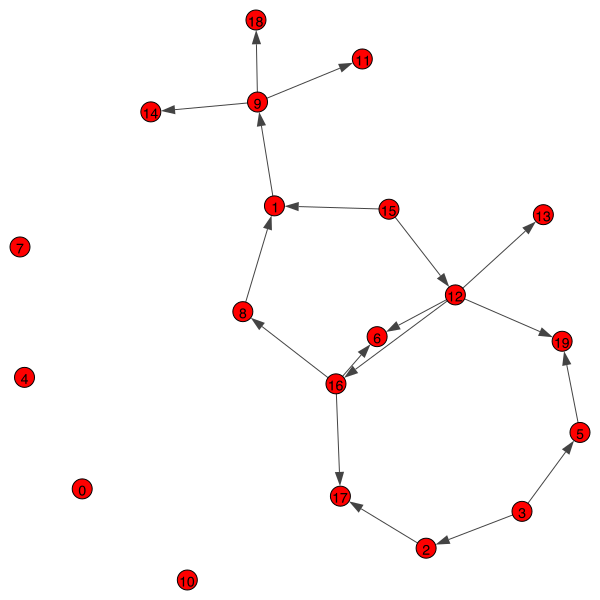

In [172]:
ig.plot(g_est_norm)

In [169]:
X_norm.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])